
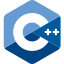
<br>

<div style="text-align:center; font-size:200%;">
 <b>Schreiben von guten Unit-Tests</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 01 Schreiben von guten Unit-Tests.ipynb -->
<!-- slides/module_410_unit_testing/topic_165_writing_good_unit_tests.cpp -->


## Mechanik von Unit-Tests

Unit-Tests sollen
- automatisiert sein: keine manuelle Interaktion
- selbsttestend sein: Pass/Fail
- feingranular sein
- schnell sein
- isoliert sein
- zu jedem Zeitpunkt erfolgreich ausführbar sein


## Einfache Struktur!

<ul>
  <li>Einfache, standardisierte Struktur<br>
    <table style="display:inline;margin:20px 20px;">
    <tr><td style="text-align:left;width:60px;padding-left:15px;">Arrange</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid
        black;">Given</td> <td
        style="text-align:left;width:300px;padding-left:15px;border-left:1px solid
        black;">
          Bereite das Test-Environment vor</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Act</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid
        black;">
           When</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px
        solid black;">
           Führe die getestete Aktion aus (falls vorhanden)</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Assert</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid
        black;">
           Then</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px
        solid black;">
           Überprüfe die Ergebnisse</td></tr>
    </table>
  </li>
  <li>Wenig Code
    <ul>
      <li>Wenig Boilerplate</li>
      <li>Factories, etc. für Tests</li>
    </ul>
  </li>
</ul>

In [ ]:
#include "check.h"


- Wie viele Tests wollen wir haben?
- Wie viele Werte wollen wir überprüfen?


## Versuch: Erschöpfendes Testen

- Wir schreiben erschöpfende Tests, d.h. Tests, die alle möglichen Eingaben eines
  Programms abdecken


- Erschöpfendes Testen ist nicht möglich
- Beispiel Passworteingabe:
  - Angenommen, Passwörter mit maximal 20 Zeichen sind zulässig,
    80 Eingabezeichen sind erlaubt (große und kleine Buchstaben, Sonderzeichen)
  - Das ergibt $80^{20}$ = 115.292.150.460.684.697.600.000.000.000.000.000.000
    mögliche Eingaben
  - Bei 10ns für einen Test würde man ca. $10^{24}$ Jahre brauchen, um alle Eingaben
    zu testen
  - Das Universum ist ungefähr $1.4 \times 10^{10}$ Jahre alt


## Effektivität und Effizienz von Tests

- Unit-Tests sollen effektiv und effizient sein
  - Effektiv: Die Tests sollen so viele Fehler wie möglich finden
  - Effizient: Wir wollen die größte Anzahl an Fehlern mit der geringsten Anzahl
    an möglichst einfachen Tests finden
- Effizienz ist wichtig, da Tests selbst Code sind, der gewartet werden muss und
  Fehler enthalten kann


## Wie schreibt man gute Unit-Tests?

- Teste beobachtbares Verhalten, nicht Implementierung
- Bevorzuge Tests von Werten gegenüber Tests von Zuständen
- Bevorzuge Tests von Zuständen gegenüber Tests von Interaktion
- Verwende Test-Doubles dann (aber auch nur dann), wenn eine Abhängigkeit
  "eine Rakete abfeuert"
- (Diese Regeln setzen voraus, dass der Code solche Tests erlaubt)


### Warum Tests von beobachtbarem Verhalten, nicht Implementierung?

Beobachtbares Verhalten
- ist leichter zu verstehen
- ist stabiler als Implementierung
- entspricht eher dem Kundennutzen


## Teste beobachtbares Verhalten, nicht Implementierung

- Abstrahiere so weit wie möglich von Implementierungsdetails
  - Auch auf Unit-Test Ebene
- Oft testen sich verschiedene Methoden gegenseitig
- Dies erfordert manchmal die Einführung von zusätzlichen Methoden
    - Diese Methoden sollen für Anwender sinnvoll sein, nicht nur für Tests
    - Oft "abstrakter Zustand" von Objekten
    - **Nicht:** konkreten Zustand öffentlich machen

In [ ]:
#include <vector>

In [ ]:
class Stack
{
private:
    std::vector<int> _items;

public:
    void push(int new_item) { _items.push_back(new_item); }

    int pop();

    // Good extension: useful, doesn't expose implementation
    int size() const { return _items.size(); }

    // Bad extension: exposes implementation
    std::vector<int>& get_items() { return _items; }
};

In [ ]:
int Stack::pop()
{
    if (_items.empty())
    {
        throw std::out_of_range("Stack is empty");
    }
    int val = _items.back();
    _items.pop_back();
    return val;
}


### Tests, wenn nur `push()` und `pop()` verfügbar sind


## Werte > Zustand > Interaktion

- Verständlicher
- Leichter zu testen
- Oft stabiler gegenüber Refactorings

Ausnahme: Testen von Protokollen


### Funktionen/Werte

In [ ]:
int add(int x, int y) { return x + y; }


### Zustand

In [ ]:
class Adder
{
public:
    void set_x(int x) { x_ = x; }
    void set_y(int y) { y_ = y; }
    void add() { result_ = x_ + y_; }
    int get_result() const { return result_; }

private:
    int x_{0};
    int y_{0};
    int result_{0};
};


### Seiteneffekt/Interaktion

- Mit Interface

In [ ]:
class AbstractAdder
{
public:
    virtual void add(int x, int y) = 0;
};

In [ ]:
class InteractionAdder
{
public:
    InteractionAdder(AbstractAdder& adder) : adder_{adder} {}

    void add(int x, int y) { adder_.add(x, y); }

private:
    AbstractAdder& adder_;
};


Test benötigt Mock/Spy


### Seiteneffekt/Interaktion

- Ohne Interface

In [ ]:
void add_and_print(int x, int y) { std::cout << x + y << std::endl; }


- Siehe `code/completed/test_examples/fun_state_interact_test.cpp` für
  den Test-Code


## Wie schreibt man testbaren Code?

- Umwandeln von weniger testbarem in besser testbaren Stil
  - Beobachtbarkeit (`state_machine.h`)
  - Keine globalen oder statischen Daten
  - Unveränderliche Datenstrukturen (Werte)
- Gutes objektorientiertes Design
  - Hohe Kohäsion
  - Geringe Kopplung, Management von Abhängigkeiten
- Etc.


## Prozess

- Iteratives Vorgehen
  - Kleine Schritte mit Tests
- Test-Driven Development (TDD)
  - Schreiben von Tests vor Code


## Mini-Workshop: Bessere Testbarkeit

- Wie können Sie Tests für die folgenden Funktionen/Klassen schreiben?
- Wie können Sie die folgenden Funktionen/Klassen verbessern, um sie besser
  testbar zu machen?
- Was für Nachteile ergeben sich dadurch?

In [ ]:
#include <iostream>

In [ ]:
int count()
{
    static int c = 0;
    return c++;
}

In [ ]:
for (int i = 0; i < 3; ++i)
{
    std::cout << count() << std::endl;
}

In [ ]:
enum class State
{
    OFF,
    ON
};

In [ ]:
class Switch
{
public:
    void toggle()
    {
        state_ = state_ == State::OFF ? State::ON : State::OFF;
        std::cout << "Switch is " << (state_ == State::OFF ? "OFF" : "ON") << std::endl;
    }

private:
    State state_{State::OFF};
};

In [ ]:
Switch s;

In [ ]:
for (int i = 0; i < 3; ++i)
{
    s.toggle();
}

In [ ]:
void print_fib(int n)
{
    int a{0};
    int b{1};
    for (int i{0}; i < n; ++i)
    {
        std::cout << "fib(" << i << ") = " << b << std::endl;
        int tmp{a};
        a = b;
        b = tmp + b;
    }
}

In [ ]:
print_fib(5);